# Exercise 1: Make a function class

In [1]:
class F:
    def __init__(self, a, w):
        self.a, self.w = a, w
        
    def __call__(self, x):
        from math import exp, sin
        return exp(-self.a * x) * sin(self.w * x)
    
f = F(a=1, w=0.1)
from math import pi
f(pi)

0.01335383513703555

In [2]:
f.a = 2
f(pi)

0.0005770715401197441

# Exercise 2: Add a data attribute to a class

In [3]:
class Account(object):
    def __init__(self, name, account_number, initial_amount):
        self.name = name
        self.no = account_number
        self.balance = initial_amount
        self.transactions = 0
        
    def deposit(self, amount):
        self.balance += amount
        self.transactions += 1
        
    def withdraw(self, amount):
        self.balance -= amount
        self.transactions += 1
        
    def dump(self):
        print("%s, %s, balance: %s, transactions: %d" % (self.name, self.no, self.balance, self.transactions))
        
    @staticmethod
    def test():
        a = Account("H.P.L.", "121344312", 1000)
        a.withdraw(3000)
        a.deposit(20)
        assert a.transactions == 2
        
Account.test()

# Exercise 3: Add functionality to a class

In [4]:
from datetime import datetime as dt
import dateutil.parser as dup

class Account(object):
    def __init__(self, name, account_number, initial_amount):
        self._name = name
        self._no = account_number
        self._transactions = {str(dt.utcnow()): initial_amount}
        
    def deposit(self, amount):
        self._transactions[str(dt.utcnow())] = amount
        
    def withdraw(self, amount):
        self._transactions[str(dt.utcnow())] = -amount
        
    def get_balance(self):
        return sum(self._transactions.values())
    
    def print_transactions(self):
        for time, amount in self._transactions.items():
            print(f"%s: %6.f" % (dup.parse(time).ctime(), amount))
        
    def dump(self):
        print("%s, %s, balance: %s" % (self._name, self._no, self.get_balance()))

In [5]:
import time
a = Account("Onno", "112312535", 20)
a.deposit(333)
time.sleep(1)
a.withdraw(34)
time.sleep(1)
a.deposit(90)
time.sleep(1)
a.withdraw(100)
time.sleep(1)
a.print_transactions()
a.dump()

Sun Mar 25 18:15:30 2018:     20
Sun Mar 25 18:15:30 2018:    333
Sun Mar 25 18:15:31 2018:    -34
Sun Mar 25 18:15:32 2018:     90
Sun Mar 25 18:15:33 2018:   -100
Onno, 112312535, balance: 309


In [6]:
# time stuff
import time
s = time.time()                                           # seconds since epoch
print(s)
print(time.ctime())                                       # print current time
print(time.ctime(2*s))                                    # print time t
l = time.localtime(s)                                     # convert seconds to time_struct (local), s is optional
print(l)
print(time.gmtime(s))                                     # convert seconds to time_struct (adjust to gmt), s is optional
print(time.mktime(l))                                     # convert time_struct to seconde (local), s is optional
p = time.strftime("time: %a, %d %b %Y %H:%M:%S", l)       # formatted string from time_struct, l is optional
print(p)
print(time.strptime(p, "time: %a, %d %b %Y %H:%M:%S"))    # make time_struct from formatted string
print(time.strptime(time.ctime()))                        # ctime format is default format for strptime

from datetime import datetime as dt
print(dt.now())     # local datetime
d = dt.utcnow()     # utc datetime
print(d)
print(d.ctime())    # print datetime (strftime works as well)

import dateutil.parser as dup
d2 = dup.parse(str(d))    # parse datetime from iso string (datetime.strptime works as well)
print(d2.ctime())
print(d.tzinfo)
print(d2.tzinfo)

1522001734.293254
Sun Mar 25 20:15:34 2018
Thu Jun 17 14:31:08 2066
time.struct_time(tm_year=2018, tm_mon=3, tm_mday=25, tm_hour=20, tm_min=15, tm_sec=34, tm_wday=6, tm_yday=84, tm_isdst=1)
time.struct_time(tm_year=2018, tm_mon=3, tm_mday=25, tm_hour=18, tm_min=15, tm_sec=34, tm_wday=6, tm_yday=84, tm_isdst=0)
1522001734.0
time: Sun, 25 Mar 2018 20:15:34
time.struct_time(tm_year=2018, tm_mon=3, tm_mday=25, tm_hour=20, tm_min=15, tm_sec=34, tm_wday=6, tm_yday=84, tm_isdst=-1)
time.struct_time(tm_year=2018, tm_mon=3, tm_mday=25, tm_hour=20, tm_min=15, tm_sec=34, tm_wday=6, tm_yday=84, tm_isdst=-1)
2018-03-25 20:15:34.301804
2018-03-25 18:15:34.301922
Sun Mar 25 18:15:34 2018
Sun Mar 25 18:15:34 2018
None
None


# Exercise 7.4: Make classes for a rectangle and a triangle

In [7]:
class Rectangle:
    def __init__(self, width, height, corner):
        self.width, self.height, self.corner = width, height, corner
        
    def area(self):
        return self.width * self.height
    
    def perimeter(self):
        return 2*self.width + 2*self.height
    
    @staticmethod
    def test():
        r = Rectangle(2, 3, (0, 0))
        import numpy as np
        assert np.allclose((r.area(), r.perimeter()), (6, 10))
        
Rectangle.test()

In [8]:
class Triangle:
    def __init__(self, vertices):
        self.x = []; self.y = []
        for x, y in vertices:
            self.x.append(x)
            self.y.append(y)
            
    def area(self):
        x, y = self.x, self.y
        return 1/2 * sum(abs(x[i - 1]*y[i] - y[i - 1]*x[i]) for i in range(3))
    
    def perimeter(self):
        from math import sqrt
        x, y = self.x, self.y
        return sum(sqrt((x[i] - x[i - 1])**2 + (y[i] - y[i - 1])**2) for i in range(3))
    
    @staticmethod
    def test():
        import numpy as np
        t = Triangle([(0, 0), (1, 0), (0, 1)])
        assert np.allclose((t.area(), t.perimeter()), (0.5, 3.414213562373095))
        
Triangle.test()

# Exercise 7.5: Make a class for quadratic functions

In [9]:
class Quadratic:
    def __init__(self, a, b, c):
        self.a, self.b, self.c = a, b, c
    
    def __call__(self, x):
        return (self.a * x**2) + self.b*x + self.c
    
    def table(self, l, r, n=10):
        from numpy import linspace
        print("          x |       f(x) ")
        print("------------+------------")
        for x in linspace(l, r, n):
            print(f" {x:10.6f} | {self(x):10.6f} ")
            
    def roots(self):
        from math import sqrt
        a, b, c = self.a, self.b, self.c
        d = -b / 2 / a; e = sqrt(b**2 - 4*a*c)
        return a + e, a - e

q = Quadratic(1, 2, -3)
q.table(0, 10)
print("\nroots:", q.roots())

          x |       f(x) 
------------+------------
   0.000000 |  -3.000000 
   1.111111 |   0.456790 
   2.222222 |   6.382716 
   3.333333 |  14.777778 
   4.444444 |  25.641975 
   5.555556 |  38.975309 
   6.666667 |  54.777778 
   7.777778 |  73.049383 
   8.888889 |  93.790123 
  10.000000 | 117.000000 

roots: (5.0, -3.0)


# Exercise 7.6: Make a class for straight lines

In [10]:
class Line:
    def __init__(self, p1, p2):
        x0, y0 = p1; x1, y1 = p2
        a = (y1 - y0) / (x1 - x0)
        self.__class__.__call__ = lambda self, x: y0 + a*(x - x0)
    
    @staticmethod
    def test():
        import numpy as np
        line = Line((0, -1), (2, 4))
        assert np.allclose((line(0.5), line(0), line(1)), (0.25, -1, 1.5))
        
Line.test()

# Exercise 7.7: Flexible handling of function arguments

In [11]:
class Line:
    def __init__(self, p1, p2):
        if all(isinstance(p, tuple) for p in (p1, p2)):
            x0, y0 = p1; x1, y1 = p2
        elif isinstance(p1, tuple):
            x0, y0 = p1
            x1, y1 = x0 + 1, y0 + p2
        elif isinstance(p2, tuple):
            x0, y0 = p2
            x1, y1 = x0 + 1, y0 + p1
        else:
            x0, y0 = 0, p1
            x1, y1 = x0 + 1, y0 + p2
        a = (y1 - y0) / (x1 - x0)
        self.__class__.__call__ = lambda self, x: y0 + a*(x - x0)
    
    @staticmethod
    def test():
        import numpy as np
        line = Line((0, -1), (2, 4))
        assert np.allclose((line(0.5), line(0), line(1)), (0.25, -1, 1.5))
        
        line = Line((0, -1), 5/2)
        assert np.allclose((line(0.5), line(0), line(1)), (0.25, -1, 1.5))
        
        line = Line(-1, 5/2)
        assert np.allclose((line(0.5), line(0), line(1)), (0.25, -1, 1.5))
        
Line.test()

# Exercise 7.8: Wrap functions in a class

In [12]:
class LagrangeInterpolation:
    def __init__(self, xp, yp):
        self.xp, self.yp = xp, yp
        
    def __call__(self, x):
        x = np.asarray(x)
        k = arange(len(self.xp))
        return sum(self.yp[k] * self.L_k(x, k), axis=1)

    def L_k(self, x, k):
        xp = self.xp
        i = empty([len(k) - 1, len(k)], dtype=int)
        for k_ in k:
            i[:, k_] = np.delete(k, k_)
        g = x.reshape(-1, 1, 1) - np.resize(xp[i], (x.size, xp[i].shape[0], xp[i].shape[1]))
        return prod(g / (xp[k] - xp[i]), axis=1)
    
    def plot(self):
        import matplotlib.pyplot as plt
        xp = self.xp
        plt.figure()
        plt.scatter(xp, self.yp)
        x = linspace(xp[0], xp[-1], 1001)
        plt.plot(x, self(x))
        plt.show()

p_L(1.2)=0.932039
sin(1.2)=0.932039


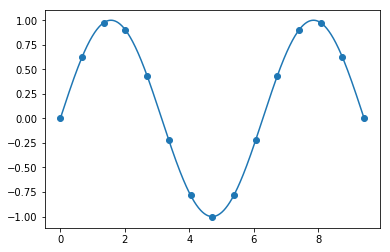

In [13]:
import numpy as np
from numpy import arange, empty, prod, sum, linspace
xp = np.linspace(0, 3*np.pi, 15)
yp = np.sin(xp)
f = LagrangeInterpolation(xp, yp)
x = 1.2
print("p_L(%g)=%g" % (x, f(x)))
print("sin(%g)=%g" % (x, np.sin(x)))
f.plot()

# Exercise 7.9: Flexible handling of function arguments

In [14]:
class LagrangeInterpolation:
    def __init__(self, f, x, n=10):
        self.xp = np.linspace(x[0], x[1], n)
        self.yp = f(self.xp)
        
    def __call__(self, x):
        x = np.asarray(x)
        k = arange(len(self.xp))
        return sum(self.yp[k] * self.L_k(x, k), axis=1)
    
    def L_k(self, x, k):
        xp = self.xp
        i = empty([len(k) - 1, len(k)], dtype=int)
        for k_ in k:
            i[:, k_] = np.delete(k, k_)
        g = x.reshape(-1, 1, 1) - np.resize(xp[i], (x.size, xp[i].shape[0], xp[i].shape[1]))
        return prod(g / (xp[k] - xp[i]), axis=1)
    
    def plot(self):
        import matplotlib.pyplot as plt
        xp = self.xp
        plt.figure()
        plt.scatter(xp, self.yp)
        x = linspace(xp[0], xp[-1], 1001)
        plt.plot(x, self(x))
        plt.show()

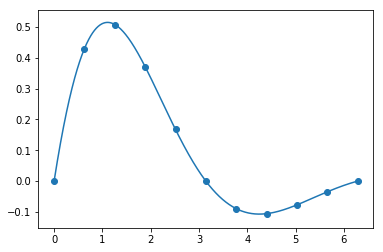

In [15]:
from numpy import exp, sin, pi

def myfunction(x):
    return exp(-x/2.0)*sin(x)

f = LagrangeInterpolation(myfunction, x=[0, 2*pi], n=11)
f.plot()

# Exercise 7.10: Deduce a class implementation

In [16]:
class Hello:
    def __call__(self, x):
        return f"Hello, {x}!"
    
    def __str__(self):
        return "Hello, World!"
    
a = Hello()
print(a("students"))
print(a)

Hello, students!
Hello, World!


# Exercise 7.11: Implement special methods in a classm

In [17]:
class F:
    def __init__(self, a, w):
        self.a, self.w = a, w
        
    def __call__(self, x):
        from math import exp, sin
        return exp(-self.a * x) * sin(self.w * x)
    
    def __str__(self):
        return "exp(-self.a * x) * sin(self.w * x)"
    
f = F(a=1, w=0.1)
from math import pi
f(pi)

0.01335383513703555

In [18]:
f.a = 2
f(pi)

0.0005770715401197441

In [19]:
print(f)

exp(-self.a * x) * sin(self.w * x)


# Exercise 7.12: Make a class for summation of series

In [20]:
def test_Sum():
    term = lambda k, x: (-x)**k
    x = 0.5
    S = Sum(term, M=0, N=3)
    
    assert abs(S(x) - 5/8) < 1e-12
    assert abs(S.term(k=4, x=x) - term(k=4, x=x)) < 1e-12

In [21]:
class Sum():
    def __init__(self, term, M, N):
        self.term, self.M, self.N = term, M, N
    
    def __call__(self, x):
        return sum(self.term(k, x) for k in range(self.M, self.N + 1))
    
test_Sum()

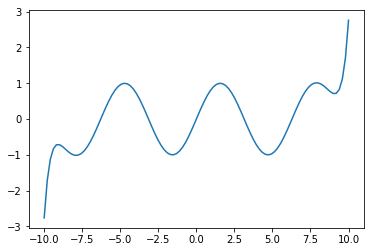

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
plt.figure()
x = np.linspace(-10, 10, 100)
y = Sum(lambda k, x: (-1)**k / factorial(2*k + 1) * x**(2*k + 1), 0, 10)(x)
plt.plot(x, y)
plt.show()

# Exercise 7.13: Apply a numerical differentitation class

In [23]:
pwd

'/Users/onnoeberhard/Desktop/Scientific Python'

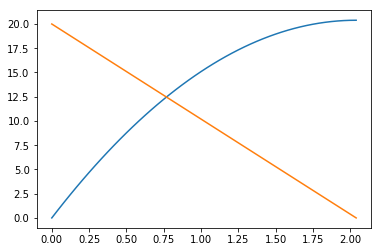

In [24]:
from package.Y import Y
from package.Derivative import Derivative
import matplotlib.pyplot as plt
import numpy as np

y = Y(20)
dy = Derivative(y.value)

t = np.linspace(0, y.v0/y.g)
plt.figure()
plt.plot(t, y.value(t))
plt.plot(t, dy(t))
plt.show()

# Exercise 7.14: Implement an addition operator

In [25]:
class Rope:
    def __init__(self, knots):
        self.knots = knots
        
    def __add__(self, other):
        return Rope(self.knots + other.knots + 1)
    
    def __str__(self):
        return str(self.knots)

In [26]:
r1 = Rope(2)
r2 = Rope(2)
r3 = r1 + r2
print(r3)

5


In [27]:
def test_Rope():
    r1 = Rope(2)
    r2 = Rope(2)
    r3 = r1 + r2
    assert r3.knots == 5

# Exercise 7.15: Implement in-place += and -= operators

In [28]:
from datetime import datetime as dt
import dateutil.parser as dup

class Account(object):
    def __init__(self, name, account_number, initial_amount):
        self._name = name
        self._no = account_number
        self._transactions = {str(dt.utcnow()): initial_amount}
        
    def __iadd__(self, amount):
        self._transactions[str(dt.utcnow())] = amount
        return self
        
    def __isub__(self, amount):
        self._transactions[str(dt.utcnow())] = -amount
        return self
        
    def get_balance(self):
        return sum(v for v in self._transactions.values())
    
    def print_transactions(self):
        for time, amount in self._transactions.items():
            print(f"%s: %6.f" % (dup.parse(time).ctime(), amount))
        
    def __str__(self):
        return "%s, %s, balance: %s" % (self._name, self._no, self.get_balance())
        
    def __repr__(self):
        return f"Account('{self._name}', {self._no}, {self.get_balance()})"

In [29]:
import time
a = Account("Onno", "112312535", 20)
a += 333
time.sleep(1)
a -= 34
time.sleep(1)
a += 90
time.sleep(1)
a -= 100
time.sleep(1)
a.print_transactions()
print(a)

Sun Mar 25 18:15:36 2018:     20
Sun Mar 25 18:15:36 2018:    333
Sun Mar 25 18:15:37 2018:    -34
Sun Mar 25 18:15:38 2018:     90
Sun Mar 25 18:15:39 2018:   -100
Onno, 112312535, balance: 309


In [30]:
repr(a)

"Account('Onno', 112312535, 309)"

In [31]:
b = eval(repr(a))

In [32]:
print(a)
print(b)

Onno, 112312535, balance: 309
Onno, 112312535, balance: 309


In [33]:
b == a

False

# Exercise 7.16: Implement a class for numerical differentiation

In [34]:
def test_Central():
    def f(x):
        return 1/2 * x**2
    
    df = Central(f)
    x = 2
    print(df(x))
    print(x)
    assert abs(df(x) - x) < 1e-6

In [35]:
class Central:
    def __init__(self, f, h=1e-6):
        self.f, self.h = f, h
        
    def __call__(self, x):
        f, h = self.f, self.h
        return (f(x + h) - f(x - h)) / 2/h

In [36]:
test_Central()

2.0000000000575113
2


In [37]:
import sympy as sp

def table(f, x, h=1e-6):
    x_list = x
    x = sp.Symbol('x')
    df_exact = sp.lambdify(x, sp.diff(f))
    df_numeric = Central(sp.lambdify(x, f), h=h)
    print("         x |         Error ")
    print("-----------+---------------")
    for x in x_list:
        print(" {:9.6f} | {:13.6e} ".format(x, df_exact(x) - df_numeric(x)))

In [38]:
x = sp.Symbol('x')
table(2*x*sp.cos(2*x) + sp.sin(2*x), np.linspace(-4, 4, 10))

         x |         Error 
-----------+---------------
 -4.000000 |  2.290324e-09 
 -3.111111 | -5.667182e-10 
 -2.222222 | -9.131380e-10 
 -1.333333 | -3.966854e-10 
 -0.444444 |  3.963496e-12 
  0.444444 |  3.963496e-12 
  1.333333 | -3.966871e-10 
  2.222222 | -1.135199e-09 
  3.111111 | -1.010797e-09 
  4.000000 |  2.290324e-09 


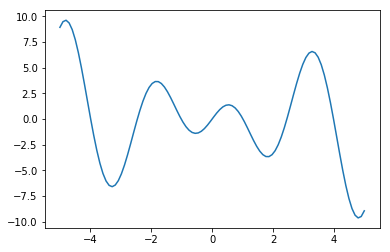

In [39]:
f = lambda x: 2*x*np.cos(2*x) + np.sin(2*x)
x = np.linspace(-5, 5, 100)
plt.figure()
plt.plot(x, f(x))
plt.show()

# Exercise 7.17: Examine a program

In [40]:
from math import *

class Backward(object):
    def __init__(self, f, h=1e-9):
        self.f, self.h = f, h
    
    def __call__(self, x):
        h, f = self.h, self.f
        return (f(x) - f(x-h))/h    # finite difference

dsin = Backward(sin)
e = dsin(0) - cos(0); print("error:", e)
dexp = Backward(exp, h=1e-7)
e = dexp(0) - exp(0); print("error:", e)

error: 0.0
error: -5.048639195592841e-08


# Exercise 7.18: Modify a class for numerical differentiation

In [41]:
class Derivative(object):
    def __init__(self, f, h=1E-5):
        self._f = f
        self._h = float(h)

    def __call__(self, x):
        f, h = self._f, self._h
        return (f(x+h) - f(x))/h

    def set_precision(self, h):
        self._h = h
    
    def get_precision(self):
        return self._h
    
def test_Derivative():
    d = Derivative(lambda x: x)
    d.set_precision(1e-2)
    assert d.get_precision() == 1e-2
    
test_Derivative()

# Exercise 7.19: Make a class for the Heaviside function

In [42]:
class Heaviside():
    import numpy as np
    
    def __init__(self, eps=None):
        self.eps = eps
    
    def __call__(self, x):
        eps = self.eps
        
        if eps:
            from numpy import sin, pi
            y = 0
            y = np.where((-eps <= x) & (x < eps), (1 + x/eps + sin(pi * x / eps)/pi) / 2, y)
            y = np.where(x >= eps, 1, y)
        else:
            y = 1 * (x >= 0)
        
        return y

    def plot(self, xmin, xmax):
        import matplotlib.pyplot as plt
        
        plt.figure()
        x = np.linspace(xmin, xmax, 200)
        plt.plot(x, self(x))
        plt.show()

In [43]:
H = Heaviside()
H(0.1)

1

In [44]:
H = Heaviside(eps=0.8)
H(0.1)

array(0.623405959900277)

In [45]:
H = Heaviside()
x = np.linspace(-1, 1, 11)
H(x)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [46]:
H = Heaviside(eps=0.8)
H(x)

array([  0.00000000e+00,  -1.94908592e-17,   1.24604605e-02,
         9.08450569e-02,   2.62460460e-01,   5.00000000e-01,
         7.37539540e-01,   9.09154943e-01,   9.87539540e-01,
         1.00000000e+00,   1.00000000e+00])

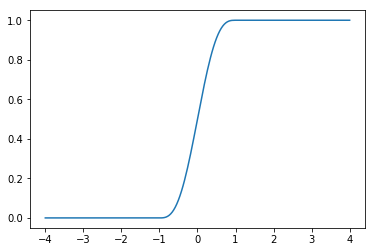

In [47]:
H = Heaviside(eps=1)
H.plot(xmin=-4, xmax=4)

# Exercise 7.20: Make a class for the indicator function

In [48]:
class Indicator():
    import numpy as np
    
    def __init__(self, a, b, eps=None):
        self.eps, self.a, self.b = eps, a, b
    
    def __call__(self, x):
        H = Heaviside(self.eps)
        y = H(x - self.a) * H(-(x - self.b))
        return y

    def plot(self, xmin, xmax):
        import matplotlib.pyplot as plt
        
        plt.figure()
        x = np.linspace(xmin, xmax, 200)
        plt.plot(x, self(x))
        plt.show()

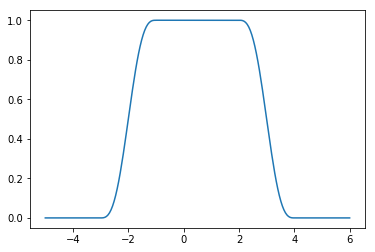

In [49]:
I = Indicator(-2, 3, eps=1)
I.plot(-5, 6)

# Exercise 7.21: Make a class for piecewise constant functions

In [50]:
class PiecewiseConstant():
    import numpy as np
    
    def __init__(self, points, xmax):
        self.points, self.xmax = points, xmax
        
    def __call__(self, x):
        y = np.nan
        for v, xi in self.points:
            y = np.where((xi <= x) & (x < self.xmax), v, y)
        return y
    
    def plot(self):
        import matplotlib.pyplot as plt
        
        plt.figure()
        x = np.linspace(self.points[0][1], self.xmax, 1000)
        plt.plot(x, self(x))
        plt.show()

In [51]:
f = PiecewiseConstant([(0.4, 1), (0.2, 1.5), (0.1, 3)], xmax=4)
print(f(1.5), f(1.75), f(4))
x = np.linspace(0, 4, 21)
print(f(x))

0.2 0.2 nan
[ nan  nan  nan  nan  nan  0.4  0.4  0.4  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.1  0.1  0.1  0.1  0.1  nan]


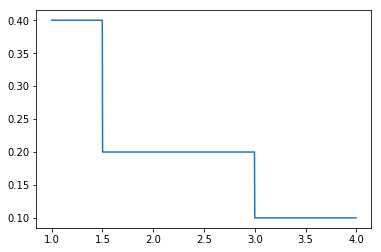

In [52]:
f.plot()

# Exercise 7.22: Speed up repeated integral calculations

In [53]:
class Integral(object):
    def __init__(self, f, a, n=100):
        self.f, self.a, self.n = f, a, n
    
    def __call__(self, x):
        if isinstance(x, np.ndarray):
            nk = int(self.n / len(x))
            I = [trapezoidal(self.f, self.a, x[0], nk)]
            for i, xi in enumerate(x[1:]):
                I.append(I[i] + trapezoidal(self.f, x[i], xi, nk))
            return I
        else:
            return trapezoidal(self.f, self.a, x, self.n)

def trapezoidal(f, a, x, n):
    dx = (x - a) / n
    I = dx / 2 * sum(f(a + (k - 1)*dx) + f(a + k*dx) for k in range(n))
    return I

In [54]:
from numpy import sin, pi
I = Integral(sin, 0, n=1000)
I(np.array([pi/2, pi, 3/2*pi, 2*pi]))

[0.99369384775594749,
 1.999953942101556,
 1.0062600943456086,
 -2.2204460492503131e-16]

# Exercise 7.23: Apply a class for polynomials

In [55]:
class Polynomial(object):
    def __init__(self, coefficients):
        self.coeff = coefficients
        
    def __call__(self, x):
        """Evaluate the polynomial.""" 
        s = 0 
        for i, c in enumerate(self.coeff):
            s += c*x**i
        return s
    
    def __add__(self, other):
        """Return self + other as Polynomial object.""" 
        
        # Start with the longest list and add in the other
        if len(self.coeff) > len(other.coeff):
            result_coeff = self.coeff[:]  # copy!
            for i in range(len(other.coeff)):
                result_coeff[i] += other.coeff[i]
        else:
            result_coeff = other.coeff[:] # copy!
            for i in range(len(self.coeff)):
                result_coeff[i] += self.coeff[i]
        
        return Polynomial(result_coeff)

In [56]:
def evaluate(x, N):
    from math import factorial
    coef = [1/factorial(k) for k in range(N + 1)]
    p = Polynomial(coef)
    print(f"N: {N:2d}, p({x:05.2f}) = {p(x):f}")

In [57]:
from math import exp
for x in [0.5, 3, 10]:
    print("exact:", exp(x))
    for N in [2, 5, 10, 15, 20, 25]:
        evaluate(x, N)

exact: 1.6487212707001282
N:  2, p(00.50) = 1.625000
N:  5, p(00.50) = 1.648698
N: 10, p(00.50) = 1.648721
N: 15, p(00.50) = 1.648721
N: 20, p(00.50) = 1.648721
N: 25, p(00.50) = 1.648721
exact: 20.085536923187668
N:  2, p(03.00) = 8.500000
N:  5, p(03.00) = 18.400000
N: 10, p(03.00) = 20.079665
N: 15, p(03.00) = 20.085534
N: 20, p(03.00) = 20.085537
N: 25, p(03.00) = 20.085537
exact: 22026.465794806718
N:  2, p(10.00) = 61.000000
N:  5, p(10.00) = 1477.666667
N: 10, p(10.00) = 12842.305115
N: 15, p(10.00) = 20952.886969
N: 20, p(10.00) = 21991.482026
N: 25, p(10.00) = 22026.076361


# Exercise 7.24: Find a bug in a class for polynomials

In [58]:
class Polynomial(object):
    def __init__(self, coefficients):
        self.coeff = coefficients
        
    def __call__(self, x):
        return sum([c*x**i for i, c in enumerate(self.coeff)])
    
    def __add__(self, other):
        maxlength = max(len(self.coeff), len(other.coeff))
        # Extend both lists with zeros to this maxlength
        self.coeff += [0]*(maxlength - len(self.coeff))
        other.coeff += [0]*(maxlength - len(other.coeff))
        result_coeff = self.coeff
        for i in range(maxlength):
            result_coeff[i] += other.coeff[i]
        return Polynomial(result_coeff)

In [59]:
p1 = Polynomial([1, 2, 3])
p2 = Polynomial([0, 4, 0])
(p1 + p2)(3)

46

# Exercise 7.25: Implement subtraction of polynomials

In [60]:
class Polynomial(object):
    def __init__(self, coefficients):
        self.coeff = coefficients
        
    def __call__(self, x):
        return sum([c*x**i for i, c in enumerate(self.coeff)])
    
    def __add__(self, other):
        maxlength = max(len(self.coeff), len(other.coeff))
        # Extend both lists with zeros to this maxlength
        self.coeff += [0]*(maxlength - len(self.coeff))
        other.coeff += [0]*(maxlength - len(other.coeff))
        result_coeff = self.coeff
        for i in range(maxlength):
            result_coeff[i] += other.coeff[i]
        return Polynomial(result_coeff)
    
    def __sub__(self, other):
        from copy import copy
        other_ = copy(other)
        other_.coeff = [-c for c in other_.coeff]
        return self.__add__(other_)
    
    def __str__(self):
        s = ""
        for i in range(0, len(self.coeff)):
            if self.coeff[i] != 0:
                s += " + %g*x^%d" % (self.coeff[i], i)
        # Fix layout
        s = s.replace("+ -", "- ")
        s = s.replace("x^0", "1")
        s = s.replace(" 1*", " ")
        s = s.replace("x^1 ", "x ")
        if s[0:3] == " + ":  # remove initial +
            s = s[3:]
        if s[0:3] == " - ":  # fix spaces for initial -
            s = "-" + s[3:]
        return s

In [61]:
p1 = Polynomial([1, 2, 3])
p2 = Polynomial([0, 4, 0])
(p1 - p2).coeff

[1, -2, 3]

# Exercise 7.26: Test the functionality of pretty print of polynomials

In [62]:
print(p1 - p2)    # looks fine.

1 - 6*x + 3*x^2


# Exercise 7.27: Vectorize a class for polynomials

In [63]:
class Polynomial(object):
    import numpy as np
    
    def __init__(self, coefficients):
        self.coeff = np.asarray(coefficients)
        
    def __call__(self, x):
        return self.coeff @ x**np.arange(len(self.coeff))
    
    def __add__(self, other):
        coeffs = sorted([self.coeff, other.coeff], key=len)
        r = coeffs[0] + coeffs[1][:len(coeffs[0])]
        r = np.append(r, coeffs[1][len(r):])
        return Polynomial(r)
    
    def __sub__(self, other):
        from copy import copy
        other_ = copy(other)
        other_.coeff = [-c for c in other_.coeff]
        return self.__add__(other_)
    
    def __str__(self):
        s = ""
        for i in range(0, len(self.coeff)):
            if self.coeff[i] != 0:
                s += " + %g*x^%d" % (self.coeff[i], i)
        # Fix layout
        s = s.replace("+ -", "- ")
        s = s.replace("x^0", "1")
        s = s.replace(" 1*", " ")
        s = s.replace("x^1 ", "x ")
        if s[0:3] == " + ":  # remove initial +
            s = s[3:]
        if s[0:3] == " - ":  # fix spaces for initial -
            s = "-" + s[3:]
        return s

In [64]:
p1 = Polynomial([1, 2, 3, 5, 7])
p2 = Polynomial([0, 4, 0, 1])
(p1 + p2).coeff

array([1, 6, 3, 6, 7])

In [65]:
(p1 + p2)(2)

185

# Exercise 7.28: Use a dict to hold polynomial coefficients

In [66]:
class Polynomial:
    import numpy as np
    
    def __init__(self, coefficients):
        self.coeff = coefficients
        
    def __call__(self, x):
        return sum(c * x**i for i, c in self.coeff.items())
    
    def __add__(self, other):
        cs = self.coeff.copy()
        for c in other.coeff:
            if c in cs:
                cs[c] += other.coeff[c]
            else:
                cs[c] = other.coeff[c]
        return Polynomial(cs)
    
    def __sub__(self, other):
        from copy import copy
        other_ = copy(other)
        other_.coeff = {k: -c for k, c in other_.coeff.items()}
        return self.__add__(other_)
    
    def __mul__(self, other):
        from collections import defaultdict
        cs = defaultdict(float)
        for i, c in self.coeff.items():
            for ii, cc in other.coeff.items():
                cs[i + ii] += c * cc
        return Polynomial(dict(cs))
    
    @staticmethod
    def test():
        # test __call__
        p1 = Polynomial({4: 1, 2: -2, 0: 3})
        assert abs(p(2) - 11) < 1e-12
        
        # test __add__
        p2 = Polynomial({0: 1, 3: 1})
        p3 = p1 + p2
        assert set(p3.coeff.keys()) == {0, 2, 3, 4}
        assert np.allclose([p3.coeff[k] for k in sorted(p3.coeff)], [4, -2, 1, 1])
        
        # test __mul__
        p4 = Polynomial({1: -2, 2: 3})
        p5 = p2 * p4
        assert set(p5.coeff.keys()) == {1, 2, 4, 5}
        assert np.allclose([p5.coeff[k] for k in sorted(p5.coeff)], [-2, 3, -2, 3])

In [67]:
p = Polynomial({4: 1, 2: -2, 0: 3})
p(2)

11

In [68]:
p1 = Polynomial({0: 1, 3: 1})
p2 = Polynomial({1: -2, 2: 3})
(p1 * p2).coeff

{1: -2.0, 2: 3.0, 4: -2.0, 5: 3.0}

In [69]:
Polynomial.test()

# Exercise 7.29: Extend class Vec2D to work with lists/tuples

In [70]:
class Vec2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        if isinstance(other, Vec2D):
            return Vec2D(self.x + other.x, self.y + other.y)
        else:
            return Vec2D(self.x + other[0], self.y + other[1])
        
    def __radd__(self, other):
        return self.__add__(other)
    
    def __sub__(self, other):
        if isinstance(other, Vec2D):
            return Vec2D(self.x - other.x, self.y - other.y)
        else:
            return Vec2D(self.x - other[0], self.y - other[1])
        
    def __rsub__(self, other):
        if isinstance(other, Vec2D):
            return Vec2D(other.x - self.x, other.y - self.y)
        else:
            return Vec2D(other[0] - self.x, other[1] - self.y)
    
    def __mul__(self, other):
        return self.x*other.x + self.y*other.y
    
    def __abs__(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __str__(self):
        return "(%g, %g)" % (self.x, self.y)

In [71]:
u = Vec2D(-2, 4)
v = u + (1, 1.5)
w = [-3, 2] - v

# Exercise 7.30: Extend class Vec2D to 3D vectors

In [72]:
class Vec3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __add__(self, other):
        return Vec3D(self.x + other.x, self.y + other.y, self.z + other.z)
    
    def __sub__(self, other):
        return Vec3D(self.x - other.x, self.y - other.y, self.z - other.z)
    
    def __mul__(self, other):
        return self.x*other.x + self.y*other.y + self.z*other.z
    
    def __abs__(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y and self.z == other.z
    
    def __str__(self):
        return "(%g, %g, %g)" % (self.x, self.y, self.z)
    
    def cross(self, other):
        return Vec3D(self.y*other.z - self.z*other.y, self.z*other.x - self.x*other.z, self.x*other.y - self.y*other.x)

In [73]:
print(Vec3D(0, 1, 0).cross(Vec3D(1, 0, 0)))

(0, 0, -1)


# Exercise 7.31: Use NumPy arrays in class Vec2D

In [74]:
class Vec:
    import math
        
    def __init__(self, *vec):
        self.v = np.asarray(vec).flatten()
    
    def __add__(self, other):
        return Vec(self.v + other.v)
    
    def __sub__(self, other):
        return Vec(self.v - other.v)
    
    def __mul__(self, other):
        return self.v @ other.v
    
    def __abs__(self):
        return math.sqrt(sum(c**2 for c in self.v))
    
    def __eq__(self, other):
        return (self.v == other.v).all()

In [75]:
v1 = v2 = Vec([1, 2, 3])
v1 * v2

14

# Exercise 7.32: Impreciseness of interval arithmetics

In [76]:
class Interval(object):
    def __init__(self, lower, upper):
        self.lo = float(lower)
        self.up = float(upper)
    
    def __add__(self, other):
        if not isinstance(other, Interval):
            other = Interval(other, other)
        a, b, c, d = self.lo, self.up, other.lo, other.up
        return Interval(a + c, b + d)
    
    def __radd__(self, other):
        return self.__add__(other)
    
    def __sub__(self, other):
        a, b, c, d = self.lo, self.up, other.lo, other.up
        return Interval(a - d, b - c)
    
    def __mul__(self, other):
        a, b, c, d = self.lo, self.up, other.lo, other.up
        return Interval(min(a*c, a*d, b*c, b*d), max(a*c, a*d, b*c, b*d))
    
    def __truediv__(self, other):
        a, b, c, d = self.lo, self.up, other.lo, other.up
        if c * d <= 0: 
            raise ValueError("Interval %s cannot be denominator because it contains zero" % other)
        return Interval(min(a/c, a/d, b/c, b/d), max(a/c, a/d, b/c, b/d))
    
    def __str__(self):
        return "[%g, %g]" % (self.lo, self.up)

In [77]:
x = Interval(1, 2)
print(x / (1 + x))

[0.333333, 1]


# Exercise 7.33: Make classes for students and courses

In [78]:
class Student:
    def __init__(self, name, courses):
        self.__dict__.update({k: v for k, v in locals().items() if k != 'self'})
        
    def __str__(self):
        s = f"Name: {self.name}\n"
        for c in self.courses:
            s += str(c) + "\n"
        return s

class Course:
    def __init__(self, title, semester, credits, grade):
        self.__dict__.update({k: v for k, v in locals().items() if k != 'self'})
        
    def __str__(self):
        return f"{self.title:30} {self.semester:11} {self.credits:2} {self.grade}"

In [79]:
print(Student("John Doe", [Course("Astronomy", "2003 fall", 10, "A"), 
                           Course("Quantum Mechanics II", "2005 spring", 5, "C")]))

Name: John Doe
Astronomy                      2003 fall   10 A
Quantum Mechanics II           2005 spring  5 C



# Exercise 7.34: Find local and global extrema of a function

In [80]:
class MinMax:
    import numpy as np
    
    def __init__(self, f, a, b, n):
        self.__dict__.update({k: v for k, v in locals().items() if k != 'self'})
        self._find_extrema()
        
    def _find_extrema(self):
        f, a, b = self.f, self.a, self.b
        
        self.Pmin, self.Pmax, self.Fmin, self.Fmax = Pmin, Pmax, Fmin, Fmax = [], [], [], []
        
        x = np.linspace(a, b, self.n)
        for i, xi in enumerate(x[1:-1]):
            if f(x[i]) < f(xi) > f(x[i + 2]):
                Pmax.append(xi)
                Fmax.append(f(xi))
            elif f(x[i]) > f(xi) < f(x[i + 2]):
                Pmin.append(xi)
                Fmin.append(f(xi))
                
        if f(a) > f(x[1]):
            Pmax.insert(1, a)
            Fmax.insert(1, f(a))
        elif f(a) < f(x[1]):
            Pmin.insert(1, a)
            Fmin.insert(1, f(a))
        if f(b) > f(x[-2]):
            Pmax.append(b)
            Fmax.append(f(b))
        elif f(b) < f(x[-2]):
            Pmin.append(b)
            Fmin.append(f(b))
                    
    def _refine_extrema(self):
        f, a, b, n = self.f, self.a, self.b, self.n
        Pmin, Pmax, Fmin, Fmax = self.Pmin, self.Pmax, self.Fmin, self.Fmax
        for i, p in enumerate(Pmin):
            if p != a and p != b:
                df = Derivative(f, h= (b - a) / n**2 / 1000)
                xmin, dfmin = p, df(p)
                for x in np.linspace(p - (b - a)/n, p + (b - a)/n, n):    # just reuse `n` as precision basis
                    if df(x) < dfmin:
                        xmin, dfmin = x, df(x)
                Pmin[i] = xmin
                Fmin[i] = f(xmin)
                
        for i, p in enumerate(Pmax):
            if p != a and p != b:
                df = Derivative(f, h= (b - a) / n**2 / 1000)
                xmax, dfmin = p, df(p)
                for x in np.linspace(p - (b - a)/n, p + (b - a)/n, n):    # just reuse `n` as precision basis
                    if df(x) < dfmin:
                        xmax, dfmin = x, df(x)
                Pmax[i] = xmax
                Fmax[i] = f(xmax)
                
    
    def get_global_minimum(self):
        return min(self.get_all_minima(), key=lambda t: t[1])
            
    def get_global_maximum(self):
        return max(self.get_all_maxima(), key=lambda t: t[1])
    
    def get_all_minima(self):
        return [(x, y) for x, y in zip(self.Pmin, self.Fmin)]
    
    def get_all_maxima(self):
        return [(x, y) for x, y in zip(self.Pmax, self.Fmax)]
    
    def __str__(self):
        from textwrap import dedent as dd
        return dd(f"""
        All minima: {', '.join(f'{p:.4f}' for p, v in self.get_all_minima())}
        All maxima: {', '.join(f'{p:.4f}' for p, v in self.get_all_maxima())}
        Global minimum: {self.get_global_minimum()[0]}
        Global maximum: {self.get_global_maximum()[0]}
        """)

In [81]:
from math import exp, sin, pi
mm = MinMax(f=lambda x: x**2 * exp(-0.2 * x) * sin(2 * pi * x), a=0, b=4, n=5001)
print(mm)
mm._refine_extrema()
print(mm)


All minima: 0.8056, 0.0000, 1.7736, 2.7632, 3.7584
All maxima: 0.3616, 1.2840, 2.2672, 3.2608, 4.0000
Global minimum: 3.7584
Global maximum: 3.2608


All minima: 0.8048, 0.0000, 1.7728, 2.7624, 3.7576
All maxima: 0.3624, 1.2848, 2.2680, 3.2616, 4.0000
Global minimum: 3.7576001599680064
Global maximum: 3.2615998400319937



# Exercise 7.35: Find the optimal production for a company

In [82]:
f = lambda x, y: 45*x + 14*y
fa = lambda x, alpha: alpha/14 - 45*x/14

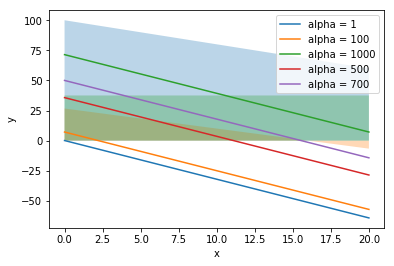

In [83]:
import matplotlib.pyplot as plt
from numpy import linspace
x = linspace(0, 20, 1000)
plt.figure()
plt.fill_between(x, 100 - 2*x, alpha=0.3)
plt.fill_between(x, 80/3 - 5/3*x, alpha=0.3)
plt.fill_between(x, 150/4, alpha=0.3)
for alpha in [1, 100, 1000, 500, 700]:
    plt.plot(x, fa(x, alpha), label=f"alpha = {alpha}")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

In [84]:
f(x=16, y=0)    # optimal solution.

720

In [85]:
import sympy as sp
x, y = sp.symbols('x y')

conditions = [
    "2*x +   y <= 100",
    "5*x + 3*y <=  80",
    "      4*y <= 150",
    "  x       >=   0",
    "        y >=   0"
]


# Compute the intersections
intersections = []
eqs = [
    sp.Eq(eval(a), eval(b)) for a, b in 
        [e.split("=") for e in 
            [c.replace("<=", "=").replace(">=", "=") for c in conditions]
]]

for e1 in eqs:
    for e2 in eqs:
        i = sp.solve([e1, e2])
        if len(i) > 1 and i not in intersections:
            intersections.append(i)
        
        
# Check conditions on intersections
corners = []

for i in intersections:
    corners.append(tuple(i.values()))
    x, y = sp.symbols('x y')
    x, y = i[x], i[y]
    for c in conditions:
        if not eval(c):
            del corners[-1]
            break

In [86]:
corners

[(0, 80/3), (16, 0), (0, 0)]

In [87]:
f = lambda c: 45*c[0] + 14*c[1]
x, y = max(corners, key=f)
print(x, y)    # yay!

16 0
